# Quantum Transpiler Performance Comparison

This notebook demonstrates how to use the performance metrics module to compare custom transpilation passes with Qiskit's default transpiler.

## 1. Import Required Modules

In [1]:
# Add the src directory to Python path
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'src'))

# Import our custom modules
from performance_metrics import TranspilerBenchmark, create_performance_comparison
from test_circuit_generator import generate_all_test_circuits, get_qft_circuit, get_random_circuit
from custom_pass import get_custom_pass_manager, MyOptimizationPass

# Import other required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All modules imported successfully!")

All modules imported successfully!


## 2. Generate Test Circuits

In [2]:
# Generate test circuits
test_circuits = generate_all_test_circuits(max_qubits_for_backend=20)

print(f"Generated {len(test_circuits)} test circuits:")
for i, qc in enumerate(test_circuits):
    print(f"  {i+1}. {qc.name} - {qc.num_qubits} qubits, depth {qc.depth()}")

Generated 45 test circuits:
  1. EfficientSU2_2Q_R1_linear - 2 qubits, depth 5
  2. EfficientSU2_3Q_R1_linear - 3 qubits, depth 6
  3. EfficientSU2_4Q_R1_linear - 4 qubits, depth 7
  4. EfficientSU2_4Q_R2_full - 4 qubits, depth 15
  5. EfficientSU2_5Q_R1_linear - 5 qubits, depth 8
  6. EfficientSU2_5Q_R2_full - 5 qubits, depth 18
  7. EfficientSU2_6Q_R1_linear - 6 qubits, depth 9
  8. EfficientSU2_6Q_R2_full - 6 qubits, depth 21
  9. EfficientSU2_7Q_R1_linear - 7 qubits, depth 10
  10. EfficientSU2_7Q_R2_full - 7 qubits, depth 24
  11. EfficientSU2_8Q_R1_linear - 8 qubits, depth 11
  12. EfficientSU2_8Q_R2_full - 8 qubits, depth 27
  13. EfficientSU2_9Q_R1_linear - 9 qubits, depth 12
  14. EfficientSU2_9Q_R2_full - 9 qubits, depth 30
  15. EfficientSU2_10Q_R1_linear - 10 qubits, depth 13
  16. EfficientSU2_10Q_R2_full - 10 qubits, depth 33
  17. EfficientSU2_11Q_R1_linear - 11 qubits, depth 14
  18. EfficientSU2_11Q_R2_full - 11 qubits, depth 36
  19. EfficientSU2_12Q_R1_linear - 12 qu

## 3. Create and Run Benchmark

### Option A: Quick Start with Convenience Function

If you just want to run a complete benchmark quickly, you can use the convenience function:

In [3]:
# Quick benchmark using convenience function (FakeTorino is default)
# Uncomment the line below to run a quick benchmark
# quick_benchmark = create_performance_comparison(max_qubits=3, save_results=True)

### Option B: Step-by-Step Analysis

For more detailed control and analysis, create the benchmark instance manually:

In [4]:
# Create benchmark instance - FakeTorino is now the default backend
benchmark = TranspilerBenchmark(max_qubits=5)

print(f"Backend: {benchmark.backend.name}")
print(f"Coupling map: {benchmark.backend.coupling_map}")
print(f"Basis gates: {benchmark.backend.basis_gates}")
print(f"Number of qubits: {benchmark.backend.num_qubits}")

Backend: fake_torino
Coupling map: [[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42], [43, 44], [44, 35], [44, 43], [44, 45]

**Note about FakeTorino Backend:**
- Uses CZ (controlled-Z) gates instead of CX (CNOT) gates as the native two-qubit gate
- This provides different optimization opportunities compared to CX-based backends
- Your custom pass may show different performance characteristics on this backend

In [5]:
# Run the complete benchmark
results = benchmark.run_full_benchmark(test_circuits)

Starting benchmark with 45 circuits on FakeTorino
Backend coupling map: [[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42], [

## 4. Display Results Summary

In [6]:
# Print formatted summary
benchmark.print_summary()


 TRANSPILER BENCHMARK SUMMARY

Circuit: EfficientSU2_2Q_R1_linear
--------------------------------------------------
Original:    Depth=  5, Gates=  9, CX=  1
Custom:      Depth= 19 (-14), Gates= 31 (-22), CX=  0, Time=0.0111s
Qiskit L0:   Depth= 19 (-14), Gates= 31 (-22), CX=  0, Time=0.0150s
Qiskit L1:   Depth= 16 (-11), Gates= 26 (-17), CX=  0, Time=0.0105s
Qiskit L2:   Depth= 14 (-9), Gates= 24 (-15), CX=  0, Time=0.0109s
Qiskit L3:   Depth= 14 (-9), Gates= 24 (-15), CX=  0, Time=0.0156s

Circuit: EfficientSU2_3Q_R1_linear
--------------------------------------------------
Original:    Depth=  6, Gates= 14, CX=  2
Custom:      Depth= 23 (-17), Gates= 50 (-36), CX=  0, Time=0.0075s
Qiskit L0:   Depth= 23 (-17), Gates= 50 (-36), CX=  0, Time=0.0057s
Qiskit L1:   Depth= 20 (-14), Gates= 43 (-29), CX=  0, Time=0.0080s
Qiskit L2:   Depth= 17 (-11), Gates= 39 (-25), CX=  0, Time=0.0103s
Qiskit L3:   Depth= 17 (-11), Gates= 39 (-25), CX=  0, Time=0.0197s

Circuit: EfficientSU2_4Q_R1_line

## 5. Generate and Display Summary Table

In [7]:
# Generate summary DataFrame
summary_df = benchmark.generate_summary_table()

# Display the table
print("Summary Table:")
display(summary_df)

Summary Table:


,Circuit,Original_Depth,Original_Gates,Original_CX,Custom_Depth,Custom_Gates,Custom_CX,Custom_Time,Qiskit_L0_Depth,Qiskit_L0_Gates,...,Qiskit_L1_CX,Qiskit_L1_Time,Qiskit_L2_Depth,Qiskit_L2_Gates,Qiskit_L2_CX,Qiskit_L2_Time,Qiskit_L3_Depth,Qiskit_L3_Gates,Qiskit_L3_CX,Qiskit_L3_Time
0,EfficientSU2_2Q_R1_linear,5,9,1,19,31,0,0.011084,19,31,...,0,0.010511,14,24,0,0.010920,14,24,0,0.015582
1,EfficientSU2_3Q_R1_linear,6,14,2,23,50,0,0.007548,23,50,...,0,0.008008,17,39,0,0.010289,17,39,0,0.019662
2,EfficientSU2_4Q_R1_linear,7,19,3,27,69,0,0.007684,27,69,...,0,0.007688,20,54,0,0.011068,20,54,0,0.023209
3,EfficientSU2_4Q_R2_full,15,36,12,79,164,0,0.011183,133,246,...,0,0.019668,67,118,0,0.022926,67,118,0,0.033003
4,EfficientSU2_5Q_R1_linear,8,24,4,31,88,0,0.008536,31,88,...,0,0.008029,23,69,0,0.010376,23,69,0,0.029383
5,EfficientSU2_5Q_R2_full,18,50,20,110,240,0,0.013404,186,374,...,0,0.018993,126,231,0,0.024491,135,235,0,0.038576
6,EfficientSU2_6Q_R1_linear,9,29,5,35,107,0,0.009964,35,107,...,0,0.008709,26,84,0,0.011855,26,84,0,0.035080
7,EfficientSU2_6Q_R2_full,21,66,30,159,338,0,0.017403,233,561,...,0,0.021811,189,381,0,0.024494,175,365,0,0.045236
8,EfficientSU2_7Q_R1_linear,10,34,6,39,126,0,0.010326,39,126,...,0,0.009313,29,99,0,0.012285,29,99,0,0.049096
9,EfficientSU2_7Q_R2_full,24,84,42,200,454,0,0.026314,289,807,...,0,0.025014,237,524,0,0.029445,256,553,0,0.057814


## 6. Create Visualizations

In [8]:
# Prepare data for visualization
viz_data = []

for _, row in summary_df.iterrows():
    circuit_name = row['Circuit']
    original_depth = row['Original_Depth']
    
    # Add custom transpiler data
    if row['Custom_Depth'] != 'Error':
        viz_data.append({
            'Circuit': circuit_name,
            'Method': 'Custom',
            'Depth': row['Custom_Depth'],
            'Gates': row['Custom_Gates'],
            'CX_Gates': row['Custom_CX'],
            'Time': row['Custom_Time'],
            'Depth_Improvement': original_depth - row['Custom_Depth']
        })
    
    # Add Qiskit transpiler data
    for level in [0, 1, 2, 3]:
        depth_col = f'Qiskit_L{level}_Depth'
        if row[depth_col] != 'Error':
            viz_data.append({
                'Circuit': circuit_name,
                'Method': f'Qiskit L{level}',
                'Depth': row[depth_col],
                'Gates': row[f'Qiskit_L{level}_Gates'],
                'CX_Gates': row[f'Qiskit_L{level}_CX'],
                'Time': row[f'Qiskit_L{level}_Time'],
                'Depth_Improvement': original_depth - row[depth_col]
            })

viz_df = pd.DataFrame(viz_data)
print(f"Prepared visualization data with {len(viz_df)} entries")

Prepared visualization data with 221 entries


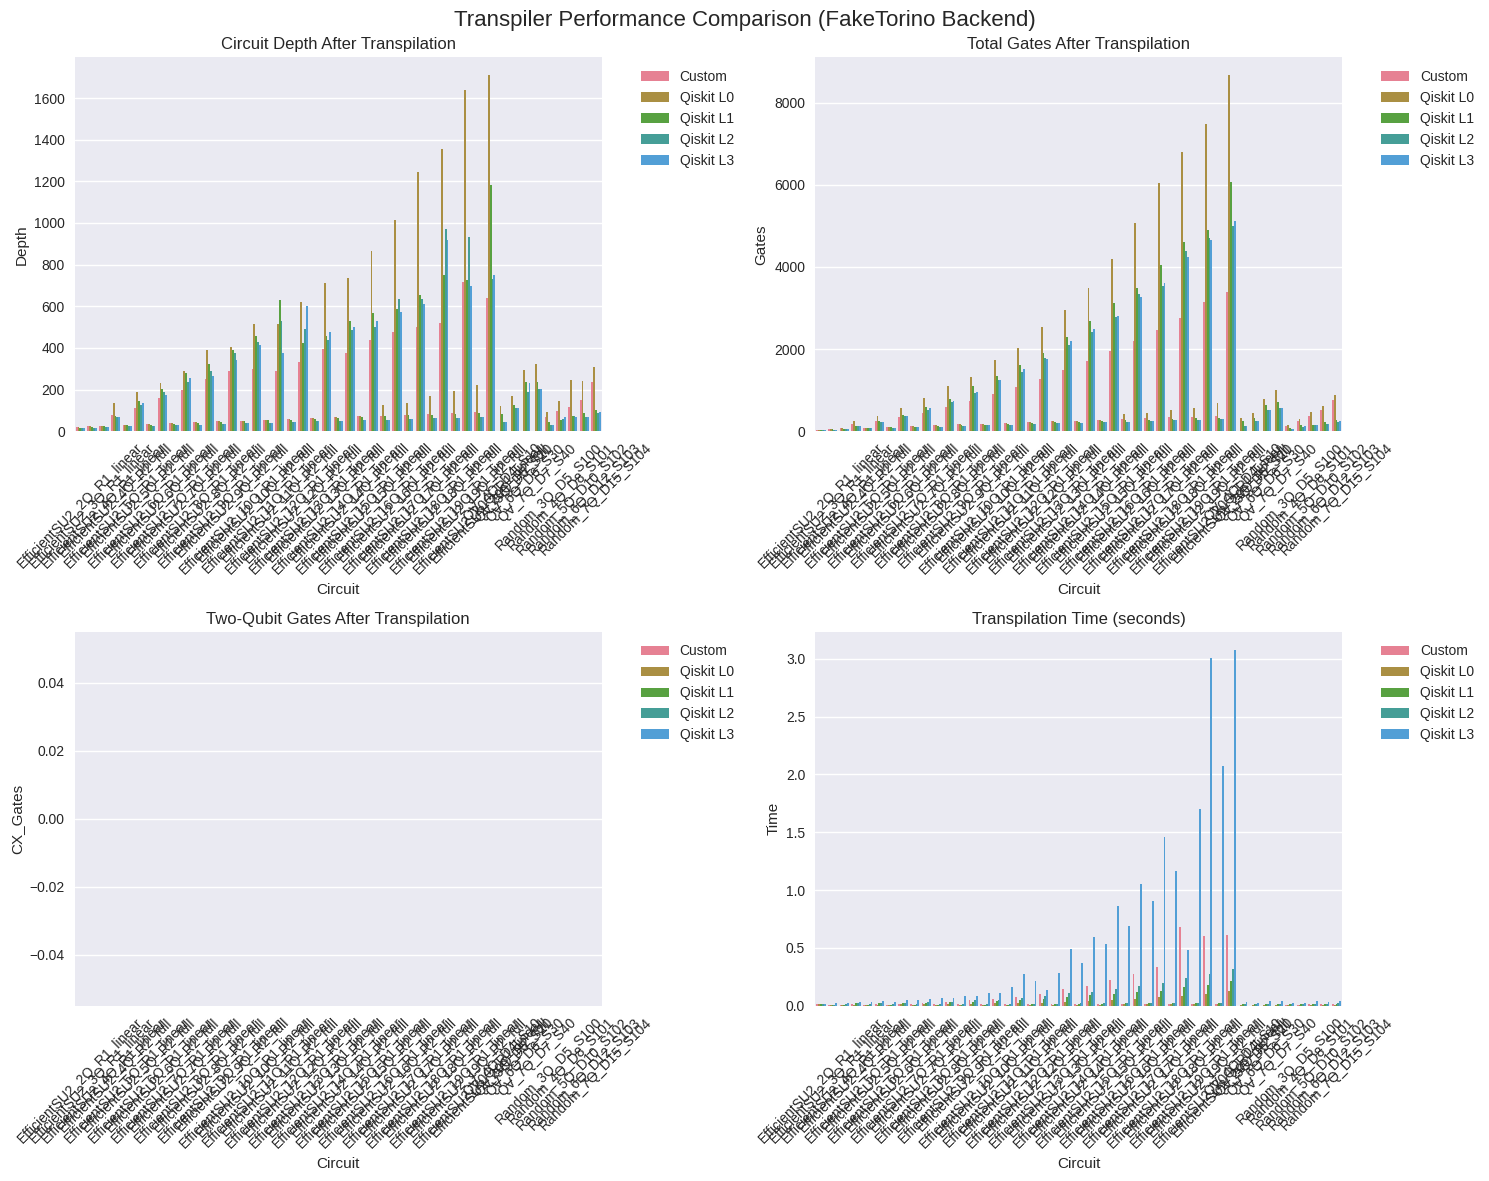

In [9]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Transpiler Performance Comparison (FakeTorino Backend)', fontsize=16)

# Plot 1: Circuit Depth Comparison
sns.barplot(data=viz_df, x='Circuit', y='Depth', hue='Method', ax=axes[0,0])
axes[0,0].set_title('Circuit Depth After Transpilation')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Total Gates Comparison
sns.barplot(data=viz_df, x='Circuit', y='Gates', hue='Method', ax=axes[0,1])
axes[0,1].set_title('Total Gates After Transpilation')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Two-Qubit Gates Comparison (CZ for FakeTorino)
sns.barplot(data=viz_df, x='Circuit', y='CX_Gates', hue='Method', ax=axes[1,0])
axes[1,0].set_title('Two-Qubit Gates After Transpilation')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Transpilation Time Comparison
sns.barplot(data=viz_df, x='Circuit', y='Time', hue='Method', ax=axes[1,1])
axes[1,1].set_title('Transpilation Time (seconds)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 7. Save Results

In [10]:
# Save results to CSV with backend-specific naming
backend_name = benchmark.backend_name
benchmark.save_results(f"transpiler_benchmark_{backend_name}_results.csv")

# Save the visualization data as well
viz_df.to_csv(f"transpiler_visualization_{backend_name}_data.csv", index=False)

print("Results saved successfully!")
print("Files created:")
print(f"  - transpiler_benchmark_{backend_name}_results.csv")
print(f"  - transpiler_visualization_{backend_name}_data.csv")

Results saved to transpiler_benchmark_FakeTorino_results.csv
Results saved successfully!
Files created:
  - transpiler_benchmark_FakeTorino_results.csv
  - transpiler_visualization_FakeTorino_data.csv


## 8. Quick Analysis Example

In [11]:
# Example: Compare custom transpiler vs best Qiskit level
analysis_results = []

for circuit_name in summary_df['Circuit'].unique():
    circuit_data = summary_df[summary_df['Circuit'] == circuit_name].iloc[0]
    
    custom_depth = circuit_data['Custom_Depth']
    if custom_depth != 'Error':
        # Find best Qiskit result
        qiskit_depths = []
        for level in [0, 1, 2, 3]:
            depth = circuit_data[f'Qiskit_L{level}_Depth']
            if depth != 'Error':
                qiskit_depths.append(depth)
        
        if qiskit_depths:
            best_qiskit_depth = min(qiskit_depths)
            improvement = best_qiskit_depth - custom_depth
            
            analysis_results.append({
                'Circuit': circuit_name,
                'Custom_Depth': custom_depth,
                'Best_Qiskit_Depth': best_qiskit_depth,
                'Improvement': improvement,
                'Better_Than_Qiskit': improvement > 0
            })

analysis_df = pd.DataFrame(analysis_results)
print("\nCustom vs Best Qiskit Analysis:")
display(analysis_df)

# Summary statistics
better_count = analysis_df['Better_Than_Qiskit'].sum()
total_count = len(analysis_df)
avg_improvement = analysis_df['Improvement'].mean()

print(f"\nSummary:")
print(f"Custom transpiler performs better on {better_count}/{total_count} circuits")
print(f"Average depth improvement: {avg_improvement:.2f}")


Custom vs Best Qiskit Analysis:


,Circuit,Custom_Depth,Best_Qiskit_Depth,Improvement,Better_Than_Qiskit
0,EfficientSU2_2Q_R1_linear,19,14,-5,False
1,EfficientSU2_3Q_R1_linear,23,17,-6,False
2,EfficientSU2_4Q_R1_linear,27,20,-7,False
3,EfficientSU2_4Q_R2_full,79,67,-12,False
4,EfficientSU2_5Q_R1_linear,31,23,-8,False
5,EfficientSU2_5Q_R2_full,110,126,16,True
6,EfficientSU2_6Q_R1_linear,35,26,-9,False
7,EfficientSU2_6Q_R2_full,159,175,16,True
8,EfficientSU2_7Q_R1_linear,39,29,-10,False
9,EfficientSU2_7Q_R2_full,200,237,37,True



Summary:
Custom transpiler performs better on 15/41 circuits
Average depth improvement: 12.46
